In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

# import os

# # !pip install fire
# # !pip install tqdm

# home_dir = '/content/gdrive/My Drive/A0/aispace'
# os.chdir(home_dir)
# !pwd

# import os
# # Get the current working directory
# current_directory = os.getcwd()
# print(current_directory)

# import shutil
# import os

In [3]:
# !pip install rasterio
# !pip install accelerate
# !pip install peft
# !pip install transformers
# !pip install transformers==4.34.0
# !pip install datasets

In [4]:
KAGGLE = False
if KAGGLE == True:
    # Define the input and output directories
    input_directory  = '/kaggle/input/begreat'  # Replace with the path to your input directory
    output_directory = '/kaggle/working'  # Replace with the path to your output directory

    def input_copy(input_directory, output_directory):
        # Get a list of files in the input directory
        files_to_copy = os.listdir(input_directory)
        # Iterate through the files and copy them to the output directory
        for file_name in files_to_copy:
            # Create the full paths for the source and destination
            source_file = os.path.join(input_directory, file_name)
            destination_file = os.path.join(output_directory, file_name)

            # Copy the file from the source to the destination
            shutil.copy(source_file, destination_file)

        # Get a list of files in the input directory
        files = os.listdir(output_directory)
        print(files)

    input_copy(input_directory, output_directory)

    source_directory  = '/kaggle/input/'  # Replace with the path to your input directory
    destination_directory = '/kaggle/working/input'  # Replace with the path to your output directory

    # Copy the source directory to the destination directory
    shutil.copytree(source_directory, destination_directory)

    input_copy(input_directory, output_directory)

In [5]:
import numpy as np

import great
from great import GReaT

import pandas as pd

################################
import numpy as np

import pandas as pd

# all imports should go here

import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

import sklearn
from sklearn.model_selection import train_test_split

import skimage.exposure

# access package for AWS access
# import boto3

import sys
import os
import subprocess
import datetime
import platform
import datetime

from tqdm import tqdm

# import ee
import h5py
import numpy as np
from datetime import datetime, timedelta  # Import timedelta here
import random
import pandas as pd

import time
import rasterio as rio
################################

from hlsdataset import HLSDataSet

import shutil

# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

/home/koya/scratch/YIELD/A0
[203]


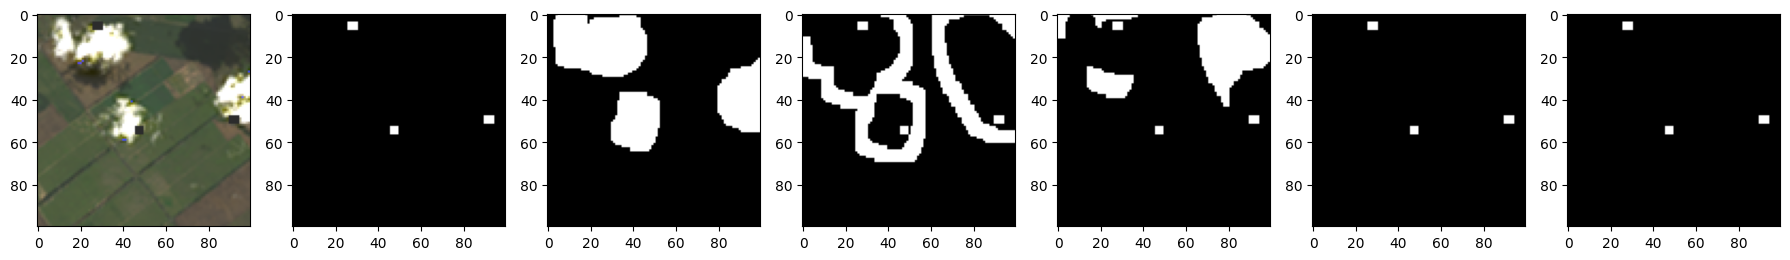

[211]


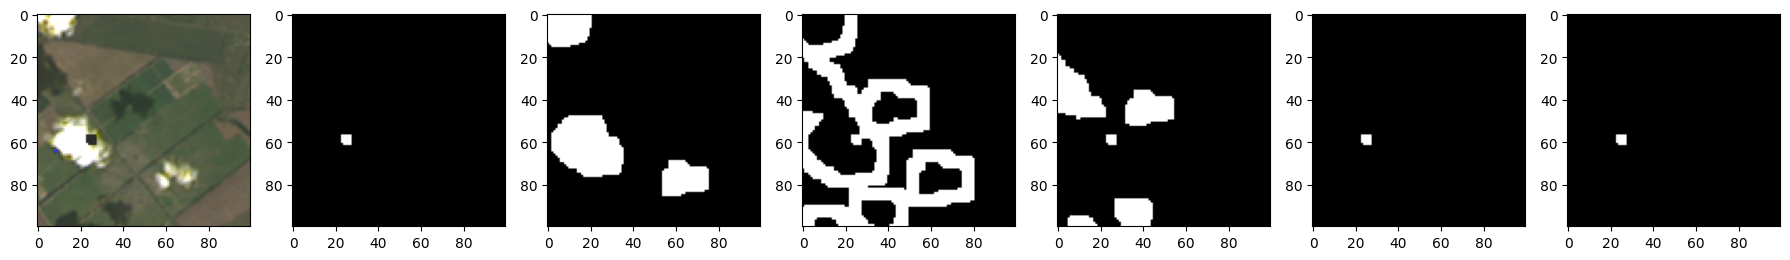

[219]


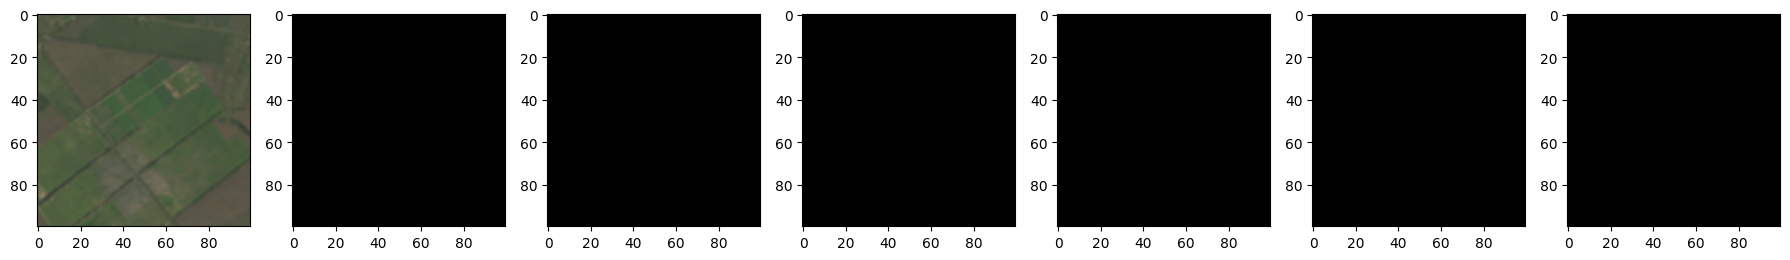

[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]


,Unnamed: 0,B01,B02,B03,B04,B05,B06,B07,B09,B10,...,snow_ice,water,aero,SAA,SZA,VAA,VZA,X,Y,DOY
0,3387000,352,435,792,808,2829,2916,1915,12,2455,...,0,0,1,14725,3342,22407,90,1500,925,203
1,3387001,380,492,842,911,2754,2861,1991,13,2443,...,0,0,1,14725,3342,22422,90,1501,925,203
2,3387002,275,374,660,673,2509,2330,1446,9,2432,...,0,0,1,14725,3342,22436,90,1502,925,203
3,3387003,205,289,562,550,2275,2100,1194,9,2421,...,0,0,1,14725,3342,22451,90,1503,925,203
4,3387004,218,309,566,579,2141,1947,1101,12,2403,...,0,0,1,14725,3342,22465,90,1504,925,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3749435,262,338,591,576,1950,2081,1194,9,2765,...,0,0,2,14999,3693,24386,119,1595,1024,219
29996,3749436,271,350,606,577,2002,2068,1179,9,2771,...,0,0,2,14999,3693,24395,119,1596,1024,219
29997,3749437,266,345,597,566,2000,2089,1193,14,2775,...,0,0,2,14999,3693,24403,119,1597,1024,219
29998,3749438,268,348,596,573,2025,2122,1215,13,2773,...,0,0,2,14999,3693,24411,119,1598,1024,219


Change columns list: ['Unnamed: 0', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B09', 'B10', 'B11', 'cirrus', 'cloud', 'adj_cloud', 'cloud_shadow', 'snow_ice', 'water', 'aero', 'SAA', 'SZA', 'VAA', 'VZA', 'X', 'Y', 'DOY']->['B02', 'B03', 'B04', 'B05', 'X', 'Y', 'DOY']
[dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32')]


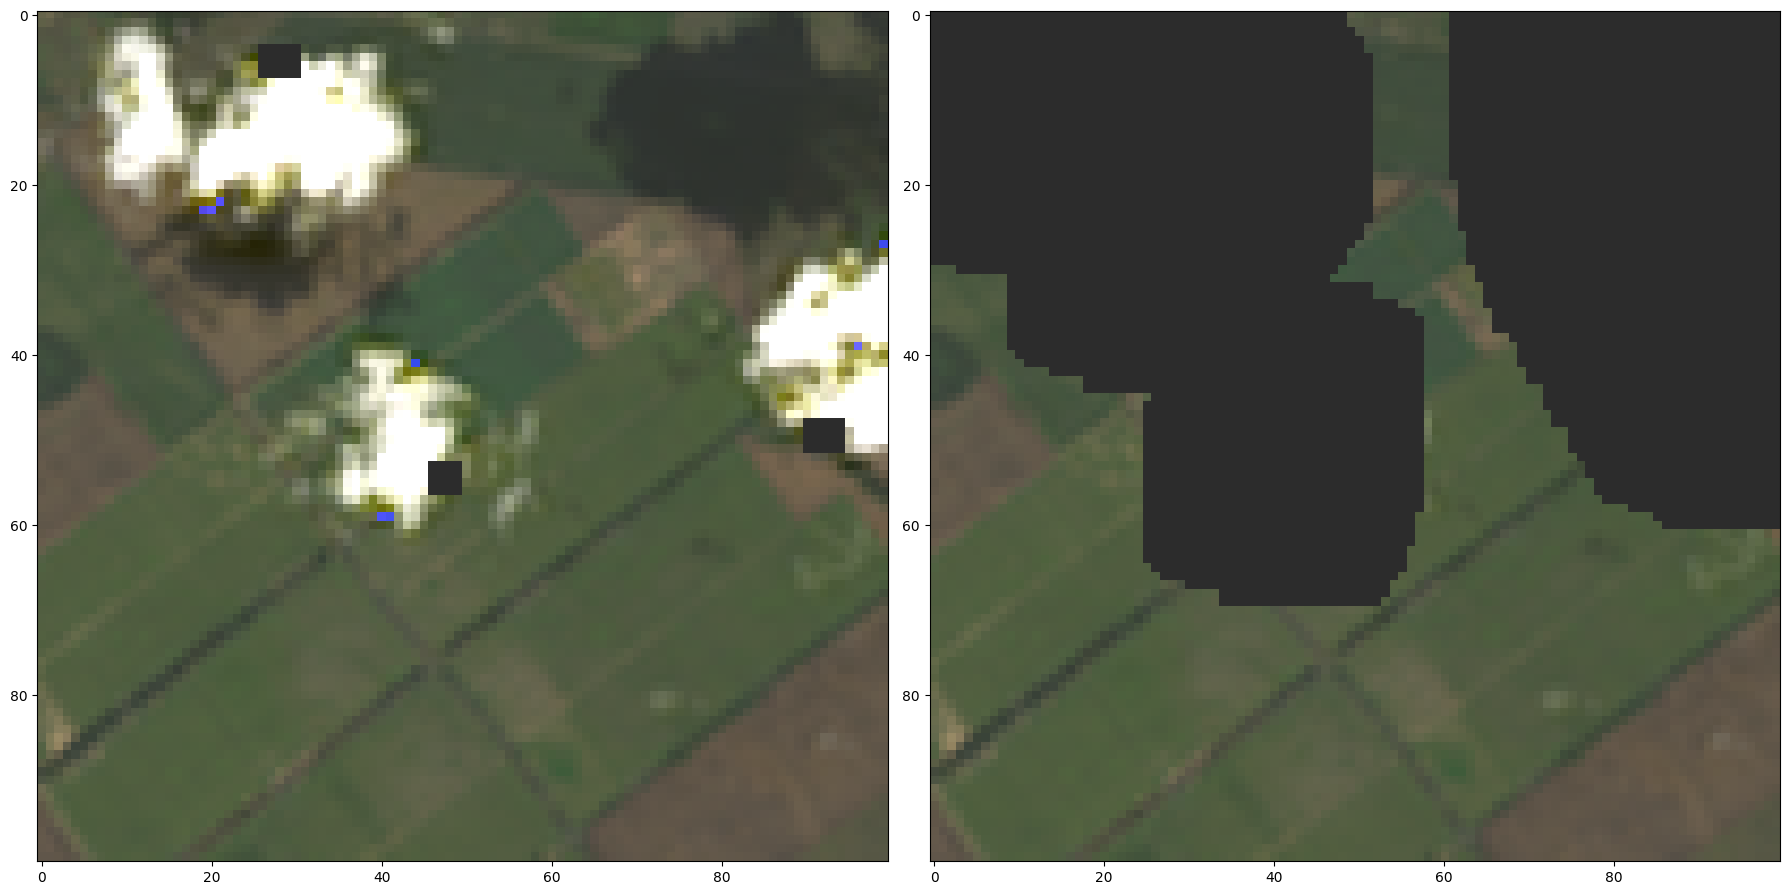

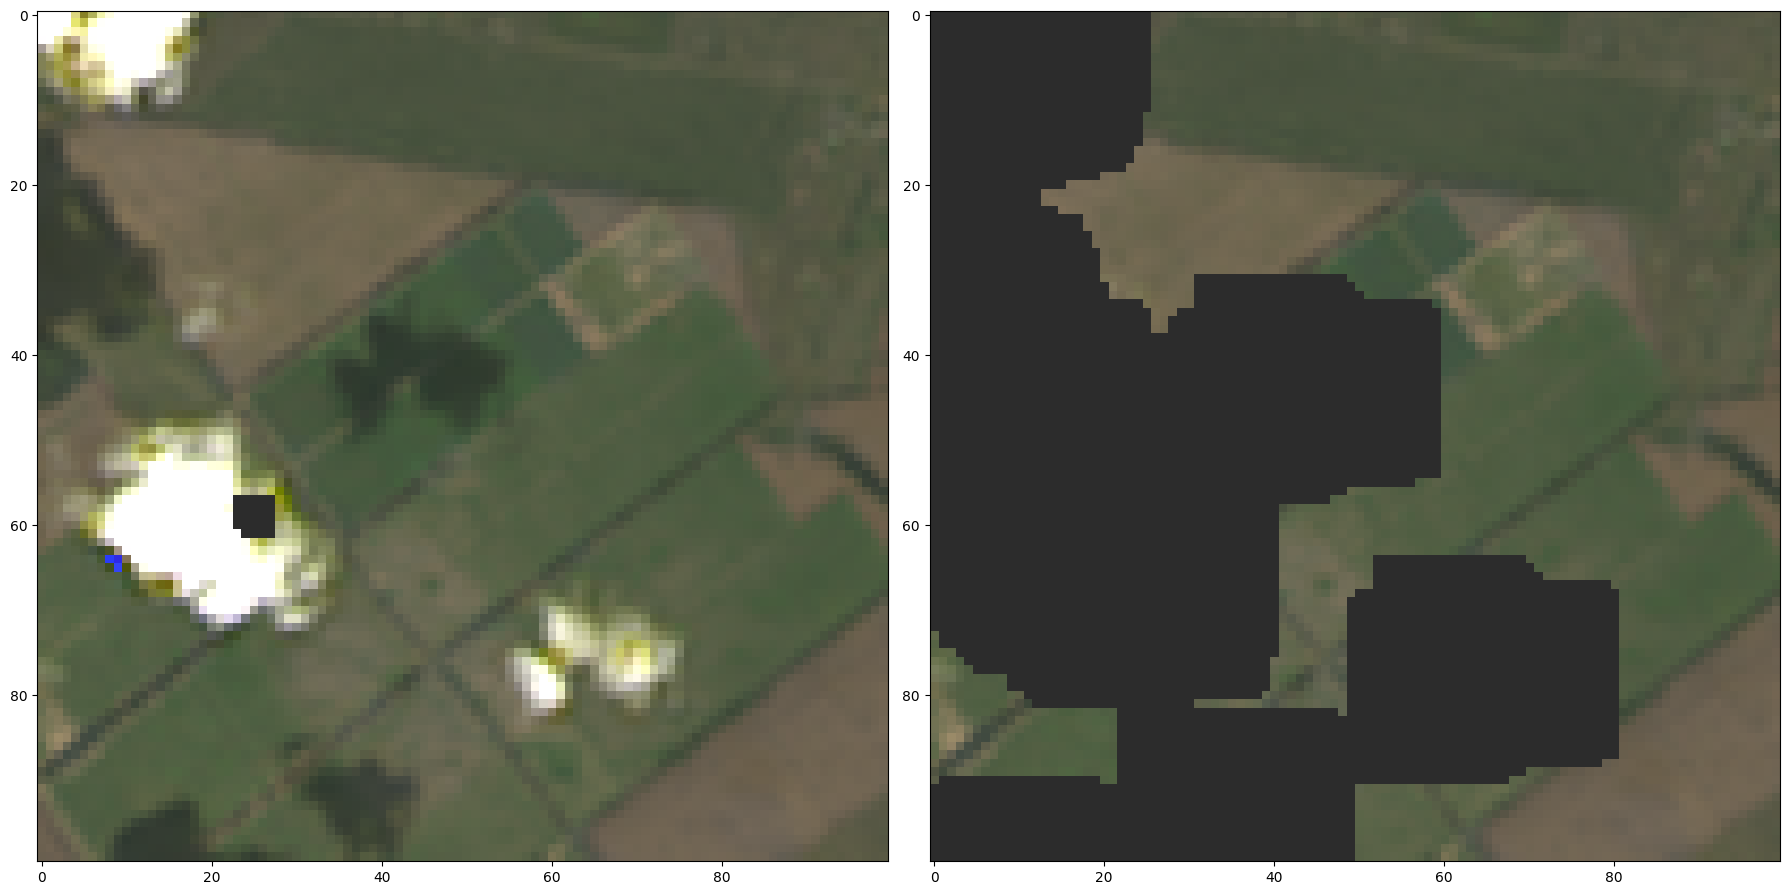

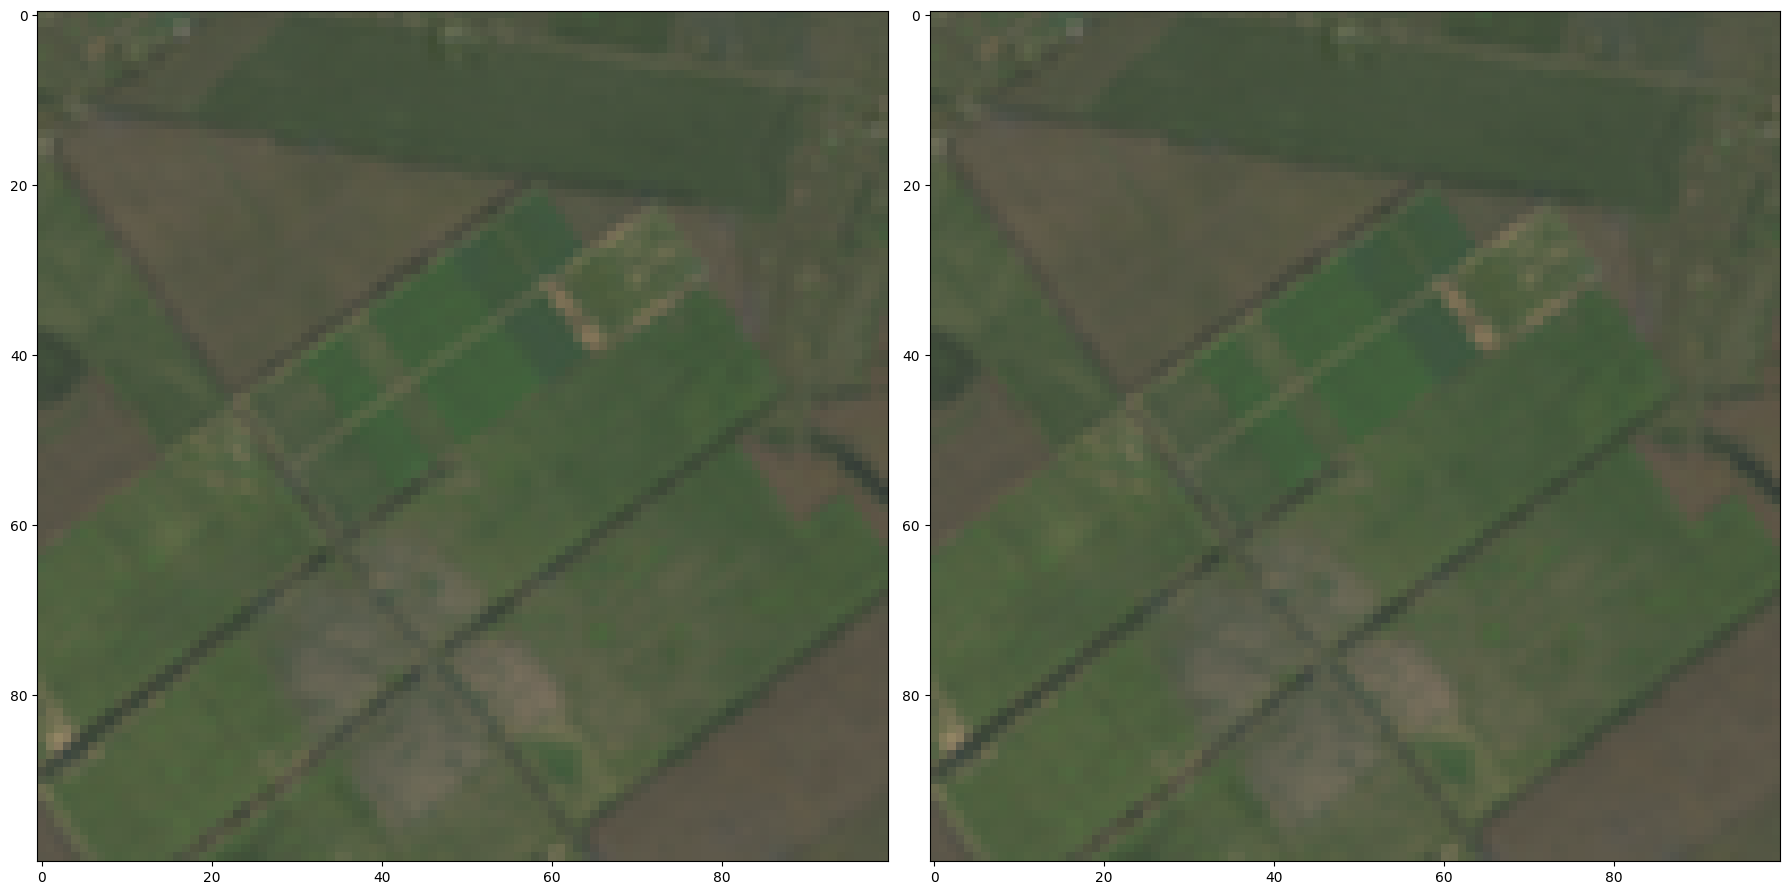

In [6]:
os.environ['TRANSFORMERS_NO_ADVISORY_WARNINGS'] = 'true'

# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

hls_data = HLSDataSet()

doys = [171, 179, 187, 195, 203, 211, 219]
doys = [203, 211, 219]
df = hls_data._get_data_doys(doys = doys, SHOW=True)
print(df.dtypes.tolist())
display(df)

# df = hls_data._set_columns_name()
# display(df)

df1, df2 = hls_data._nan_9999()
# display(df1)
# display(df2)

df1, df2 = hls_data._set_clear_cloud()
# display(df1)
# display(df2)

data, nan, clear, cloud = hls_data._set_train_columns_name()
# display(data)
# display(nan)
# display(clear)
# display(cloud)

print(data.dtypes.tolist())
# fn

to_impute = hls_data._to_impute()
hls_data._inference_data()
hls_data._inference_imshow()



In [7]:
!pwd
#### FOR V-100 GPU USABILITY################################
epochs_steps = 200   # 250 #50
save_steps = 1000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
logging_steps = 200 # 250 #25 #9380  #1000
#### batch_size = 250 for T4
batch_size = 232 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
#######################################
######### SET TRAINER_RUN ARGUMENTS ##########################
learning_rate = 0.00001
lr_scheduler_type = 'cosine_with_restarts'
lr_scheduler_type = 'constant_with_warmup'
lr_scheduler_type = 'cosine'
lr_scheduler_type = 'linear'

# load_model_path = 'A0BASE/run[0]/checkpoint-16000'
experiment_dir = 'A0BASE/run[1]'
load_model_path = 'checkpoint-16000'

model = GReaT(llm=load_model_path,
              batch_size=batch_size, epochs=epochs_steps, logging_steps=logging_steps, save_steps=save_steps,
              # evaluation_strategy='steps',
              # dataloader_num_workers=2, #fp16=True,
              save_total_limit=2,
              prediction_loss_only=True,
              experiment_dir=f'{experiment_dir}',
              dataloader_num_workers=2,
              # efficient_finetuning = efficient_finetuning,
              learning_rate=learning_rate,
              lr_scheduler_type=lr_scheduler_type,
              warmup_ratio=0.1,
              # optim=optimizer,
              fp16 = True,
              # torch_compile=True,   #### for Ampere
              # bf16=True,            #### for Ampere
              )

print(model.model)

/home/koya/scratch/YIELD/A0
GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


In [10]:
# nan_data = test_data[test_data.isnull().any(axis=1)].astype('float64').copy()
nan_data = to_impute.copy()
# nan_data.astype('int16')
# Reset the index to remove it
nan_data = nan_data.reset_index(drop=True)
print(nan_data.dtypes.tolist())

display(nan_data)
# fn

print(f'NumPy version:{np.__version__}')
np.float = float

imputed_data = model.impute(nan_data, k=256, max_length=50000, temperature=0.01, device='cpu')

display(nan_data)
display(imputed_data)

hls_data._imputed_data(imputed_data)

hls_data._inference_data()
hls_data._inference_imshow()

imputed_data.to_csv('imputed_output.csv')

[dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32')]


,B02,B03,B04,B05,X,Y,DOY
0,NaN,NaN,NaN,NaN,1500.0,925.0,203.0
1,NaN,NaN,NaN,NaN,1501.0,925.0,203.0
2,NaN,NaN,NaN,NaN,1502.0,925.0,203.0
3,NaN,NaN,NaN,NaN,1503.0,925.0,203.0
4,NaN,NaN,NaN,NaN,1504.0,925.0,203.0
...,...,...,...,...,...,...,...
9630,NaN,NaN,NaN,NaN,1527.0,985.0,211.0
9631,NaN,NaN,NaN,NaN,1524.0,986.0,211.0
9632,NaN,NaN,NaN,NaN,1525.0,986.0,211.0
9633,NaN,NaN,NaN,NaN,1526.0,986.0,211.0


NumPy version:1.25.2


TypeError: 'NoneType' object is not iterable

In [ ]:
data = pd.concat([imputed_data, clear_data], axis=0) #, ignore_index=True)

display(data)

# train_data = data

# Sort the DataFrame by 'X', 'Y', and 'DOY'
data = data.sort_values(by=['Y', 'X', 'DOY', ])
test_data = test_data.sort_values(by=['Y', 'X', 'DOY'])


doys = [171, 179, 187, 195, 203, 211, 219]
doys = [203, 211, 219]
# train_doys = [219]
# train_data_list = []
otput_data_list = []
for doy in doys:
    # data = _get_hls(doy)
    # croped_data = _crop_data(data, doy)
    tr_df = data[ data['DOY'] == int(doy)].copy()
    tr_df2 = test_data[ test_data['DOY'] == int(doy)].copy()
    # otput_data_list.append(tr_df)
    _image_df2(tr_df, tr_df2)

In [ ]:
fn

In [ ]:
data = clear.copy() #[0:1000]

table_dtype = 'int16'

data = data.astype(table_dtype)
print(data.dtypes.tolist())
# Reset the index to remove it
data = data.reset_index(drop=True)
# train_data.columns = final_columns_list
# display(data)


# Split the DataFrame into training and test DataFrames
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data = train_data.reset_index(drop=True)
display(train_data)
test_data = test_data.reset_index(drop=True)
display(test_data)

# #### FOR CPU USABILITY, for 2 pixels #################################
# epochs_steps = 1  # 250 #50
# save_steps = 1   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 1 # 250 #25 #9380  #1000

#### FOR T-4 GPU USABILITY################################
epochs_steps = 200   # 250 #50
save_steps = 100   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
logging_steps = 50 # 250 #25 #9380  #1000
#### batch_size = 250 for T4
batch_size = 200 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
#######################################

# #### FOR V-100 GPU USABILITY################################
# epochs_steps = 200   # 250 #50
# save_steps = 1000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 200 # 250 #25 #9380  #1000
# #### batch_size = 250 for T4
# batch_size = 232 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
# #######################################

# #### FOR A-100 GPU USABILITY################################
# epochs_steps = 800   # 250 #50
# save_steps = 10000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 500 # 250 #25 #9380  #1000
# #### batch_size = 250 for T4
# batch_size = 800 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
# #######################################

EXP_NAME = 'exp-A100'
EXP_NAME = 'exp-V100'
EXP_NAME = 'exp-T4'

EXP_NAME = 'A0BASE'

#### 1 ###########
# learning_rate = 5e-5
# lr_scheduler_type = 'constant' # constant_with_warmup

step_checkpoint = 16000
######### SET TRAINER_RUN ARGUMENTS ##########################
learning_rate = 0.00001
lr_scheduler_type = 'cosine_with_restarts'
lr_scheduler_type = 'constant_with_warmup'
lr_scheduler_type = 'cosine'
lr_scheduler_type = 'linear'

TRAINER_RUN = 0
if TRAINER_RUN == 0:
  load_model_path = 'distilgpt2'
  experiment_dir = f"{EXP_NAME}/run[{TRAINER_RUN}]"
elif TRAINER_RUN > 0:
  before = pd.read_csv(f'{EXP_NAME}/run[{TRAINER_RUN-1}].csv')
  load_model_path = before['experiment_dir'][0] + f'/checkpoint-{step_checkpoint}'
  experiment_dir  = f"{EXP_NAME}/run[{TRAINER_RUN}]"

TRAINER_DICT = pd.DataFrame({'EXP_NAME' : EXP_NAME}, index = [TRAINER_RUN])    # dict()


TRAINER_DICT['TRAINER_RUN'] = TRAINER_RUN
TRAINER_DICT['table_dtype'] = table_dtype
TRAINER_DICT['epochs_steps'] = epochs_steps
TRAINER_DICT['save_steps'] = save_steps
TRAINER_DICT['logging_steps'] = logging_steps
TRAINER_DICT['batch_size'] = batch_size
TRAINER_DICT['learning_rate'] = learning_rate
TRAINER_DICT['lr_scheduler_type'] = lr_scheduler_type
TRAINER_DICT['experiment_dir'] = experiment_dir

display(pd.DataFrame.from_dict(TRAINER_DICT))

##### SET experiment_dir & efficient_finetuning #######################
efficient_finetuning = ''  #'lora'
if efficient_finetuning == 'lora':
    experiment_dir = f"{experiment_dir}_{efficient_finetuning}"
##### SET experiment_dir & efficient_finetuning #######################
optimizer = 'adamw_torch'
# optimizer = 'adamw_torch_fused'  #'adamw_torch'  #'adamw_torch_fused'
if optimizer == 'adamw_torch_fused':
    experiment_dir = f"{experiment_dir}_{optimizer}"
#### SET model_save_dir through save_model #########################
# model_save_dir = f'{EXP_NAME}/ZeroModel_{efficient_finetuning}'


print('experiment_dir :', experiment_dir)
print('load_model_path:', load_model_path)


model = GReaT(llm=load_model_path,
              batch_size=batch_size, epochs=epochs_steps, logging_steps=logging_steps, save_steps=save_steps,
              # evaluation_strategy='steps',
              # dataloader_num_workers=2, #fp16=True,
              save_total_limit=2,
              prediction_loss_only=True,
              experiment_dir=f'{experiment_dir}',
              dataloader_num_workers=2,
              efficient_finetuning = efficient_finetuning,
              learning_rate=learning_rate,
              lr_scheduler_type=lr_scheduler_type,
              warmup_ratio=0.1,
              # optim=optimizer,
              fp16 = True,
              # torch_compile=True,   #### for Ampere
              # bf16=True,            #### for Ampere
              )

print(f'----------- Model architecture, efficient_finetuning: {efficient_finetuning} -----------------------')
print(model.model)
print(f'----------------------------------------------------------------------------------------------------')
# fn

model.fit(data=train_data)
# model.fit(data=train_data, test_data=test_data)

TRAINER_DICT.to_csv(f'{experiment_dir}.csv')



In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
fn

In [ ]:
fn